# TA2: Handwritten Text Recognition and NLP Processing in Native Language

## Steps to Follow:

> 1. **Capture or upload** an image of a handwritten page written in your mother tongue.

> 2. **Preprocess the image** to improve clarity (e.g., convert to grayscale, resize, denoise).

> 3.  **Use OCR** to extract text from the image (e.g., Tesseract OCR with language pack for your language).

> 4. **Normalize** the extracted text (remove noise, unwanted characters, fix encoding issues).

> 5. **Tokenize** the text using an appropriate NLP tokenizer for your language.

> 6. **Perform one NLP task**, such as:
>    - Language detection
>    - Translation
>    - Summarization
>    - Named Entity Recognition (NER)

> 7. **Display the final output** in a readable format (console, notebook cell, or GUI).


### Step 0: Install & Import Required Libraries


In [1]:
# Install All Required Python Libraries

!pip install gdown
!pip install indic-nlp-library
!pip install pytesseract
!pip install opencv-python-headless
!pip install googletrans==4.0.0-rc1
!pip install deep-translator

# Update and Install All Required Libraries and Tools

!sudo apt-get update
!sudo apt-get upgrade
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-mar
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 427.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=5cc35e75790dec6d5ac75ec8bdd35f79d0e34cfd53e5f66f7fafbf6d5ecbd320
  Stored in 

In [2]:
# Import All Required Libraries

import gdown
from google.colab import files
from PIL import Image
import numpy as np
import cv2
import pytesseract
import re
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from indicnlp.tokenize.indic_tokenize import trivial_tokenize

### Step 1: Upload Image

In [14]:
import gdown
from PIL import Image
from google.colab import files

# Option for the user to try dynamic upload quickly
user_choice = input("Would you like to skip static image and upload a dynamic image? (y/n) [default: n]: ").strip().lower()

if user_choice == 'y':
    print("Proceeding with dynamic image upload...")
    # Dynamic Image Uploads
    uploaded = files.upload()  # Upload image from user
    filename = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Open image with PIL
    img_pil = Image.open(filename)
    img_pil.show()

else:
    # Static Image Uploads
    file_id = '1z526YFcKb2g8HftFLPhH9Gg25I-jNtHh'  # Extract the file ID from the shared link
    url = f'https://drive.google.com/uc?export=download&id={file_id}'

    try:
        # Try downloading the static image using gdown
        gdown.download(url, 'marathi.gif', quiet=False)

        # Open the image with PIL
        img_pil = Image.open('marathi.gif')
        img_pil.show()

    except Exception as e:
        # If static image download fails, handle with dynamic image upload
        print(f"Static image download failed with error: {e}")
        print("Proceeding with dynamic image upload...")

        # Dynamic Image Uploads
        uploaded = files.upload()  # Upload image from user
        filename = list(uploaded.keys())[0]  # Get the name of the uploaded file

        # Open image with PIL
        img_pil = Image.open(filename)
        img_pil.show()


Would you like to skip static image and upload a dynamic image? (y/n) [default: n]: n


Downloading...
From: https://drive.google.com/uc?export=download&id=1z526YFcKb2g8HftFLPhH9Gg25I-jNtHh
To: /content/marathi.gif
100%|██████████| 7.23k/7.23k [00:00<00:00, 13.0MB/s]


### Step 2: Preprocess Image

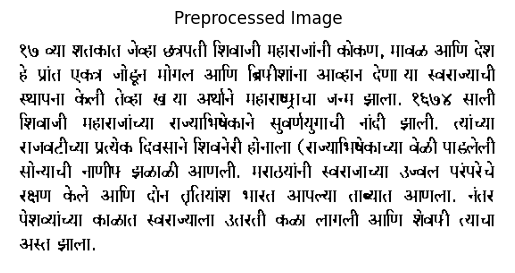

In [4]:
# Convert PIL to OpenCV format
img_cv = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Preprocess image
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Show the preprocessed image
plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

### Step 3: OCR Extraction

In [5]:
# OCR with Marathi language
custom_config = r'--oem 3 --psm 6'
ocr_text = pytesseract.image_to_string(thresh, lang='mar', config=custom_config)
print("OCR Text (Marathi):\n", ocr_text)

OCR Text (Marathi):
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण, मावळ आणि देश
हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची
स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला. ९६७४ साली
शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली. त्यांच्या
राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला (राज्याभिषेकाच्या वेळी पाडलेली
सोन्याची नाणीप झळाळी आणली. मराठयांनी स्वराजाच्या उग्जल परंपरेचे
रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला. नंतर
पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा
अस्त झाला.



### Step 4: Normalize Text

In [6]:
# Normalize the OCR output
normalized_text = re.sub(r'[^\u0900-\u097F\s]', '', ocr_text)
normalized_text = re.sub(r'\s+', ' ', normalized_text).strip()
print("\nNormalized Marathi Text:\n", normalized_text)


Normalized Marathi Text:
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण मावळ आणि देश हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला ९६७४ साली शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली त्यांच्या राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला राज्याभिषेकाच्या वेळी पाडलेली सोन्याची नाणीप झळाळी आणली मराठयांनी स्वराजाच्या उग्जल परंपरेचे रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला नंतर पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा अस्त झाला


### Step 5: Tokenization

In [7]:
# Tokenization

# Simple whitespace tokenizer
tokens_simple = normalized_text.split()
print("\nTokenized Words (Simple Split):\n", tokens_simple)

# Advanced Indic NLP tokenizer
tokens_advanced = trivial_tokenize(normalized_text, lang='mar')
print("\nTokenized Words (Indic NLP):\n", tokens_advanced)

tokens = tokens_advanced


Tokenized Words (Simple Split):
 ['१७', 'व्या', 'शतकात', 'जेव्हा', 'छत्रपती', 'शिवाजी', 'महाराजांनी', 'कोकण', 'मावळ', 'आणि', 'देश', 'हे', 'प्रांत', 'एकज', 'जोडून', 'मोगल', 'आणि', 'ब्रिपीशांना', 'आव्हान', 'देणा', 'या', 'स्वराज्याची', 'स्थापना', 'केली', 'तेव्हा', 'ख', 'या', 'अर्थाने', 'महाराष्यराचा', 'जन्म', 'झाला', '९६७४', 'साली', 'शिवाजी', 'महाराजांच्या', 'राज्याभिषेकाने', 'सुवर्णयुगाची', 'नांदी', 'झाली', 'त्यांच्या', 'राजबटीच्या', 'प्रत्येक', 'दिवसाने', 'शिवनेरी', 'होनाला', 'राज्याभिषेकाच्या', 'वेळी', 'पाडलेली', 'सोन्याची', 'नाणीप', 'झळाळी', 'आणली', 'मराठयांनी', 'स्वराजाच्या', 'उग्जल', 'परंपरेचे', 'रक्षण', 'केले', 'आणि', 'दोन', 'तृतियांश', 'भारत', 'आपल्या', 'ताब्यात', 'आणला', 'नंतर', 'पेशव्यांच्या', 'काळात', 'स्वराज्याला', 'उत्तरती', 'कळा', 'लागली', 'आणि', 'शेबपी', 'त्याचा', 'अस्त', 'झाला']

Tokenized Words (Indic NLP):
 ['१७', 'व्या', 'शतकात', 'जेव्हा', 'छत्रपती', 'शिवाजी', 'महाराजांनी', 'कोकण', 'मावळ', 'आणि', 'देश', 'हे', 'प्रांत', 'एकज', 'जोडून', 'मोगल', 'आणि', 'ब्रिपीशांना', 'आव्

### Step 6: Translation

In [8]:
# Convert Marathi numbers to English numbers in text and tokens
devanagari_to_english_digits = {
    '०': '0', '१': '1', '२': '2', '३': '3', '४': '4',
    '५': '5', '६': '6', '७': '7', '८': '8', '९': '9'
}

def convert_devanagari_numbers(text):
    return re.sub(r'[\u0966-\u096F]+', lambda m: ''.join(devanagari_to_english_digits.get(ch, ch) for ch in m.group()), text)

In [9]:
# Translate full text
normalized_with_english_digits = convert_devanagari_numbers(normalized_text)
translation_text = GoogleTranslator(source='mr', target='en').translate(normalized_with_english_digits)
print("\nEnglish Translated Text:\n", translation_text)


English Translated Text:
 In the 17th century, when Chhatrapati Shivaji Maharaj established the Konkan Maval and the country to challenge the Mughals and the British, Maharashtra was born in 9674 Shivaji Maharaj's coronation of the golden age. Protecting the tradition and two -thirds of India were taken into custody, after the Peshwa's time, Swarajya was responding and Sheeppi was dissolved.


In [10]:
# Translate individual tokens
translated_tokens = []
for token in tokens:
    if re.fullmatch(r'[\u0966-\u096F]+', token):
        translated_tokens.append(convert_devanagari_numbers(token))
    else:
        try:
            translated = GoogleTranslator(source='mr', target='en').translate(token)
            translated_tokens.append(translated)
        except:
            translated_tokens.append(token)

print("\nTranslated Tokens with Marathi Numbers Converted:\n", translated_tokens)


Translated Tokens with Marathi Numbers Converted:
 ['17', 'Th', 'Centuries', 'When', 'Chhatrapati', 'Shivaji', 'By the Maharaja', 'Konkan', 'Maval', 'And', 'Country', 'This', 'Province', 'Unity', 'By connecting', 'Mogal', 'And', 'To the brippens', 'Challenge', 'Consecutive', 'These', 'State', 'Establishment', 'Kelly', 'When', 'Eclectic', 'These', 'In a sense', 'Maharashtra', 'Birth', 'Became', '9674', 'Sill', 'Shivaji', 'To the Maharaja', 'Coronation', 'Golden age', 'Vet', 'Happened', 'Their', 'Palative', 'Each', 'Day', 'Shivneri', 'Honala', 'Coronation', 'At a time', 'Demolish', 'Golden', 'Coinage', 'Shrub', 'Brought', 'By the Marathas', 'Vocal', 'Perey', 'Traditional', 'Protection', 'Made', 'And', 'Two', 'Diarrhea', 'India', 'To you', 'Possession', 'Brought', 'Later', 'Peshwa', 'Period', 'Self -state', 'Reply', 'Key', 'Began', 'And', 'Shabby', 'Its', 'Weed', 'Became']


### Step 7: Final Output

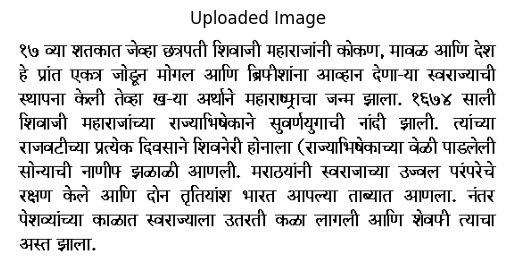


Final Output Summary:

Original Marathi OCR Text:
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण मावळ आणि देश हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला ९६७४ साली शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली त्यांच्या राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला राज्याभिषेकाच्या वेळी पाडलेली सोन्याची नाणीप झळाळी आणली मराठयांनी स्वराजाच्या उग्जल परंपरेचे रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला नंतर पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा अस्त झाला

Marathi to English Translation:
 In the 17th century, when Chhatrapati Shivaji Maharaj established the Konkan Maval and the country to challenge the Mughals and the British, Maharashtra was born in 9674 Shivaji Maharaj's coronation of the golden age. Protecting the tradition and two -thirds of India were taken into custody, after the Peshwa's time, Swarajya was responding and Sheeppi was dissolved.

Tokens

In [11]:
# Display the image
plt.imshow(img_pil)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Final Output
print("\nFinal Output Summary:\n")
print("Original Marathi OCR Text:\n", normalized_text) # OCR Marathi Text
print("\nMarathi to English Translation:\n", translation_text) # English Translated Text
print("\nTokens in Marathi:\n", tokens) # Marathi Tokens
print("\nTranslated Tokens in English:\n", translated_tokens) # English Tokens

In [12]:
# Show tokens in tabular format
df = pd.DataFrame({'Marathi': tokens, 'English': translated_tokens})
df

,Marathi,English
0,१७,17
1,व्या,Th
2,शतकात,Centuries
3,जेव्हा,When
4,छत्रपती,Chhatrapati
...,...,...
72,आणि,And
73,शेबपी,Shabby
74,त्याचा,Its
75,अस्त,Weed
